# 手写HITS算法

In [1]:
from math import sqrt
from pygraph.classes.digraph import digraph
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class HITSIterator:
    __doc__ = "FILE_PATH"
    
    def __init__(self,dg):
        # 最大迭代次数
        self.max_iterations = 100
        # 迭代结束条件
        self.min_delta = 0.0001
        self.graph = dg
        
        self.hub = {}
        self.authority = {}
        for node in self.graph.nodes():
            self.hub[node] = 1
            self.authority[node] = 1
            
    def hits(self):
        # 计算每个页面的hub、authority值
        
        if not self.graph:
            return
        
        flag = False
        # 遍历迭代
        for i in range(self.max_iterations):
            # 记录每轮的变化值
            change = 0.0
            # 标准化系数
            norm = 0
            tmp = {}
            # 计算每个页面的authority值
            tmp = self.authority.copy()
            for node in self.graph.nodes():
                self.authority[node] = 0
                # 遍历所有入射页面
                for incident_page in self.graph.incidents(node):
                    self.authority[node] += self.hub[incident_page]
                norm += pow(self.authority[node],2)
            # 标准化
            norm = sqrt(norm)
            for node in self.graph.nodes():
                self.authority[node] /= norm
                change += abs(tmp[node] - self.authority[node])
                
            # 计算每个页面的hub值
            norm = 0
            tmp = self.hub.copy()
            for node in self.graph.nodes():
                self.hub[node] = 0
                # 遍历所有出射页面
                for neighbor_page in self.graph.neighbors(node):
                    self.hub[node] += self.authority[neighbor_page]
                norm += pow(self.hub[node],2)
            # 标准化
            norm = sqrt(norm)
            for node in self.graph.nodes():
                self.hub[node] /= norm
                change += abs(tmp[node] - self.hub[node])
                
            print("This is No. %s iteration" % (i + 1))
            print("authority",self.authority)
            print("hub",self.hub)
            
            if change < self.min_delta:
                flag = True
                break
        if flag:
            print("finished in %s iterations!" % (i + 1))
        else:
            print("finished out of 100 iterations!")
            
        print("===============================================================")
        print("The best authority page:",max(self.authority.items(),key=lambda x:x[1]))
        print("The best hub page:",max(self.hub.items(),key=lambda x:x[1]))

In [3]:
if __name__ == '__main__':
    dg = digraph()

    dg.add_nodes(["A", "B", "C", "D", "E"])

    dg.add_edge(("A", "C"))
    dg.add_edge(("A", "D"))
    dg.add_edge(("B", "D"))
    dg.add_edge(("C", "E"))
    dg.add_edge(("D", "E"))
    dg.add_edge(("B", "E"))
    dg.add_edge(("E", "A"))

    hits = HITSIterator(dg)
    hits.hits()

This is No. 1 iteration
authority {'A': 0.2581988897471611, 'B': 0.0, 'C': 0.2581988897471611, 'D': 0.5163977794943222, 'E': 0.7745966692414834}
hub {'A': 0.412081691846067, 'B': 0.6868028197434451, 'C': 0.4120816918460671, 'D': 0.4120816918460671, 'E': 0.137360563948689}
This is No. 2 iteration
authority {'A': 0.07161148740394328, 'B': 0.0, 'C': 0.21483446221182984, 'D': 0.5728918992315463, 'E': 0.7877263614433762}
hub {'A': 0.408529743989514, 'B': 0.705642285072797, 'C': 0.4085297439895141, 'D': 0.4085297439895141, 'E': 0.03713906763541037}
This is No. 3 iteration
authority {'A': 0.019234326202820506, 'B': 0.0, 'C': 0.21157758823102554, 'D': 0.5770297860846152, 'E': 0.7886073743156409}
hub {'A': 0.40826853033350996, 'B': 0.7070016013092492, 'C': 0.40826853033351007, 'D': 0.40826853033351007, 'E': 0.009957769032524634}
This is No. 4 iteration
authority {'A': 0.005154707656790011, 'B': 0.0, 'C': 0.21134301392839044, 'D': 0.5773272575604813, 'E': 0.7886702714888718}
hub {'A': 0.40824974

In [4]:
g = nx.Graph()

nodes = ["A", "B", "C", "D", "E"]
for i in nodes:
    g.add_node(i)

g.add_edge("A", "C")
g.add_edge("A", "D")
g.add_edge("B", "D")
g.add_edge("C", "E")
g.add_edge("D", "E")
g.add_edge("B", "E")
g.add_edge("E", "A")

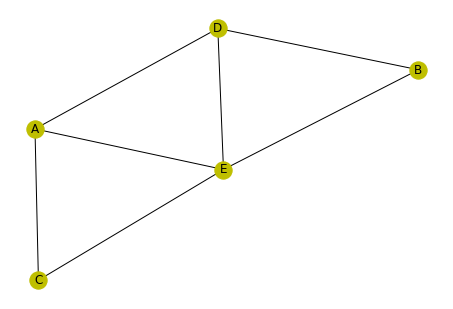

In [5]:
nx.draw(g,with_labels=True,node_color='y')

```
  - `node_size`:  指定节点的尺寸大小(默认是300)
  - `node_color`:  指定节点的颜色 (默认是红色，可以用字符串简单标识颜色，例如'r'为红色，'b'为绿色等)
  - `node_shape`:  节点的形状（默认是圆形，用字符串'o'标识）
  - `alpha`: 透明度 (默认是1.0，不透明，0为完全透明) 
  - `width`: 边的宽度 (默认为1.0)
  - `edge_color`: 边的颜色(默认为黑色)
  - `style`: 边的样式(默认为实现，可选： solid|dashed|dotted,dashdot)
  - `with_labels`: 节点是否带标签（默认为True）
  - `font_size`: 节点标签字体大小 (默认为12)
  - `font_color`: 节点标签字体颜色（默认为黑色）
```

参考文献：[HITS算法——从原理到实现](https://blog.csdn.net/rubinorth/article/details/52231620)